# *Supervised Learning for predicting Investable Companies*

## Install dependencies

In [1]:
!pip install sklearn

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## *Data Source* - 

- Makwana, Ravi and Bhatt, Dhruvil and Delwadia, Kirtan and Shah, Agam and Chaudhury, Bhaskar, How to Get Investment Grade Rating in the Age of Explainable Ai?. Available at SSRN: https://ssrn.com/abstract=4163283 or http://dx.doi.org/10.2139/ssrn.4163283

In [64]:
df = pd.read_csv("corporateCreditRatingWithFinancialRatios.csv")

## EDA

In [65]:
df.shape

(7805, 25)

In [66]:
df.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


## There is a brakedown of the exact Investment rating as well as a Binary investment rating decision. For this analysis, I simply want to explore predicting if a company is investable or not, so I will disregard the exact Rating. Note: Any rating with BBB- or higher, is considered investable while a rating of BB+ or lower is considered not investable.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

### Separate the categoricals from the numericals

In [68]:
cats = df[['Sector','Ticker', 'Rating Date', 'Rating', 'Corporation', 'Rating Agency']]
nums = df.drop(columns = cats.columns)

In [69]:
nums.describe()

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,7.805000e+03,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,7.371616e+05,0.653299,4052.576810,1.926313,0.452804,0.177349,42.433909,11.531612,11.582683,20.071493,8.659944,5.995566,0.849843,15.950507,21.481589,4.575705,7.076084,0.479756,0.119491
std,5.143542e+05,0.475950,1870.848802,1.921651,2.629158,34.456334,23.742020,25.469044,25.483934,24.380407,27.866408,24.055577,0.696204,230.592526,462.734075,9.229899,24.382027,6.050626,7.253660
min,1.750000e+03,0.000000,100.000000,0.174900,-86.363600,-1473.098000,-87.684000,-461.787800,-461.787800,-360.816900,-476.010000,-414.824800,0.068400,-11258.210000,-14023.260000,-226.442500,-745.454500,-91.330200,-130.665800
25%,9.355600e+04,0.000000,2834.000000,1.077300,0.286500,0.419700,22.453900,6.098200,6.181100,11.162100,4.008700,2.637100,0.399500,6.022800,-12.233900,2.391900,3.692600,-0.448500,-0.723700
50%,8.795260e+05,1.000000,3714.000000,1.496800,0.427200,0.752800,39.635400,12.120100,12.155800,18.304500,9.705100,6.938900,0.661200,12.500000,10.564100,4.767500,7.440800,0.237800,0.133500
75%,1.091587e+06,1.000000,4931.000000,2.161000,0.542200,1.211600,59.641700,19.464600,19.539900,30.661600,16.676900,12.366700,1.038800,20.515700,26.894100,7.881300,12.515100,1.088800,0.997800
max,1.748790e+06,1.000000,9997.000000,34.076800,171.500000,194.375000,100.000000,93.993000,93.993000,286.493500,221.289400,219.390300,8.503900,7038.461000,9882.979000,114.716900,466.666700,282.192100,107.737700


### Check to see if any features are highly correlated with one another and choose one to keep and discard the others.

<AxesSubplot:>

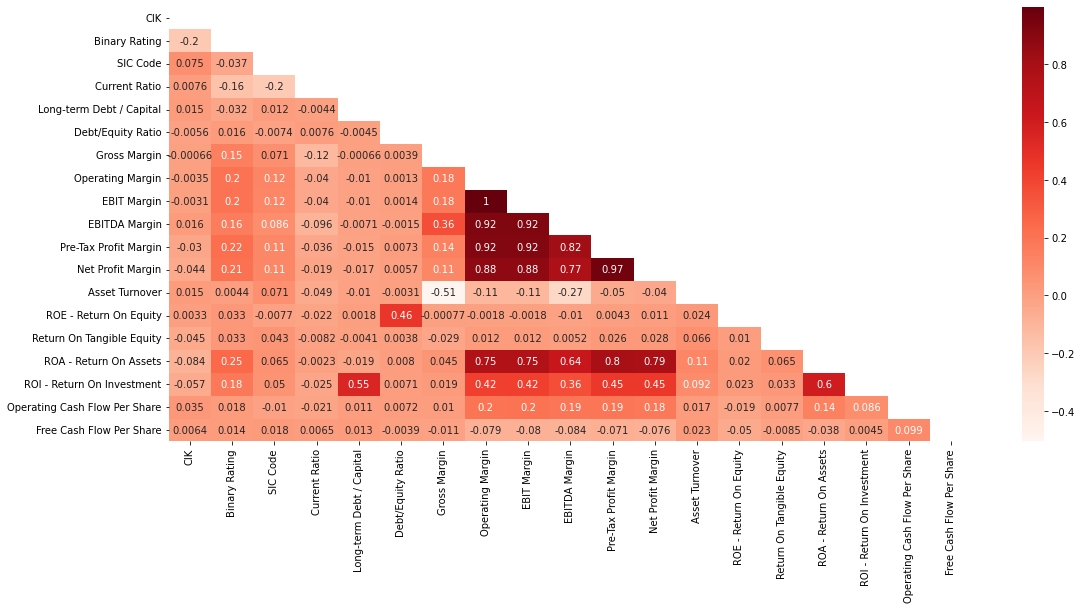

In [70]:
plt.figure(figsize=(18,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot = True, cmap='Reds')

### It is noticable that EBIT Margin, EBITDA Margin, Pre-Tax Profit Margin, Net Profit Margin, and Operating Margin are all highly correlated. I will only keep Net Profit Margin for the predictive model since investors are most interested in realized gains and this variable is likely the highest of interest among the correlated variables 

In [71]:
#Dropping highly correlated features
nums = nums.drop(columns = ['EBIT Margin','EBITDA Margin','Pre-Tax Profit Margin','Operating Margin','ROA - Return On Assets'])
nums

,CIK,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,1056903,1,4941.0,1.1507,0.4551,0.8847,77.6230,8.3224,0.3173,8.1724,8.1978,4.4530,1.9957,-0.1333
1,8670,1,7374.0,1.1129,0.0072,0.0073,43.6619,13.5690,0.3324,22.0354,47.2858,21.8765,0.2501,0.3132
2,8858,1,5065.0,1.9276,0.2924,0.4255,11.9008,2.1418,2.4620,13.6376,16.7991,9.6494,-7.6079,-7.3231
3,1035201,1,4941.0,0.8358,0.4708,0.9491,64.5096,9.0246,0.2946,9.6412,9.7015,5.1018,1.7438,-0.8999
4,721371,1,5122.0,1.2931,0.2644,0.4036,3.8385,0.6518,4.9276,11.1256,19.4184,8.1844,1.9725,2.4174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,1065088,1,7370.0,3.4927,0.5065,1.0263,79.3878,20.0768,0.4839,29.6077,95.6757,14.6116,-1.2323,-1.2826
7801,1065088,1,7370.0,3.4927,0.5065,1.0263,79.3878,20.0768,0.4839,29.6077,95.6757,14.6116,-1.2323,-1.2826
7802,739708,0,4832.0,1.7606,0.1034,0.1523,54.2787,8.0626,0.8218,11.8335,13.5108,10.6101,0.0907,1.2552
7803,739708,0,4832.0,1.7606,0.1034,0.1523,54.2787,8.0626,0.8218,11.8335,13.5108,10.6101,0.0907,1.2552


## Exoplore the distributions of rating decisions among both categorical and numerical features

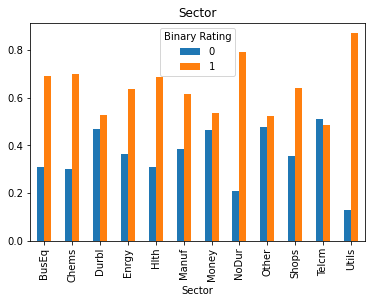

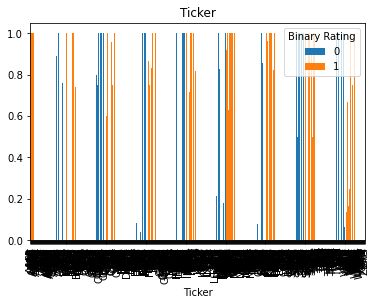

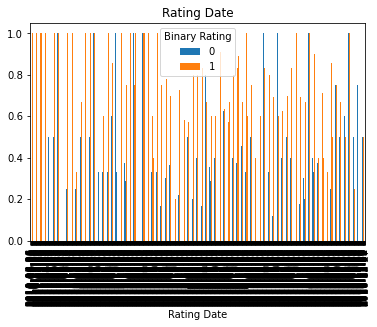

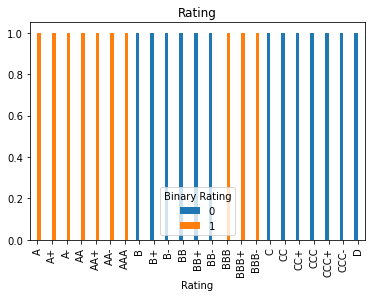

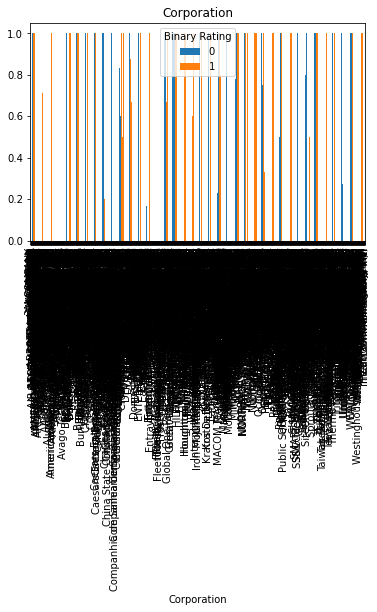

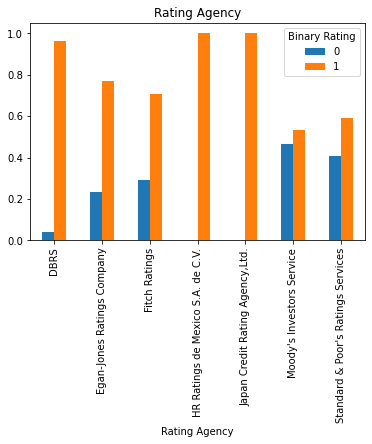

In [47]:
for i in cats.columns:
    pd.crosstab(cats[i],df['Binary Rating'],normalize='index').plot(kind='bar')
    plt.title(i)
    plt.show()

## The first thing I notice is the Sector chart. The Utility industry appears to be the most investable industry among the group whereas the Telecomunication industry has the highest porportion of univestable companies. The second thing I notice is that two rating agencies only have ratings of "Investable" in the dataset.

## The only categorical variable I find valuable is 'Sector'. 'Ticker' and 'Corporation' are simply name references which hold no association with being investable or not. The Rating date is irrelevant along with the actual rating since I am only interested in the binary decision. The 'Rating Agency' will be disregarded since the goal is to determine a decision based on company fundamentals and although the Rating agency affects the decision that will be used for supervised learning, it would not be available in applying the model.

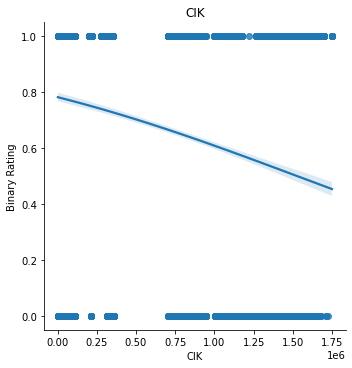

C:\Users\Tonyj\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


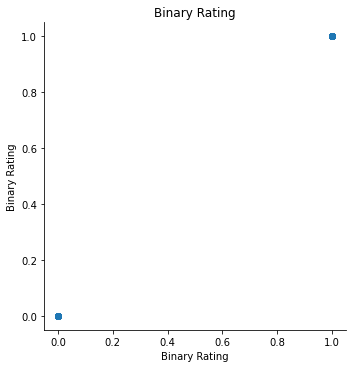

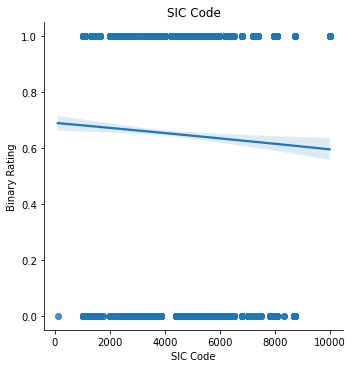

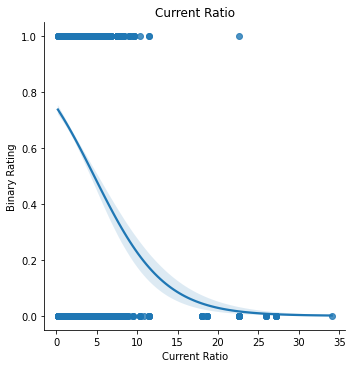

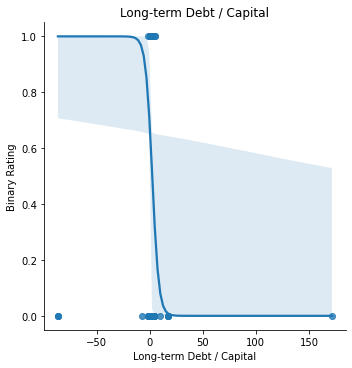

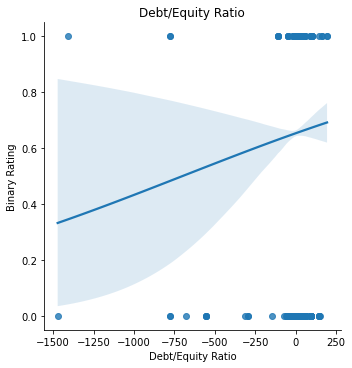

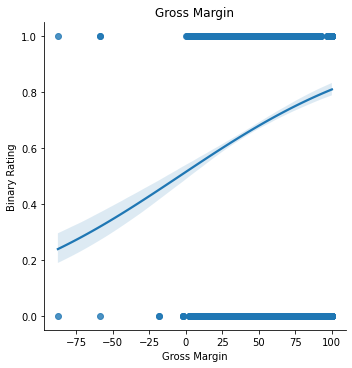

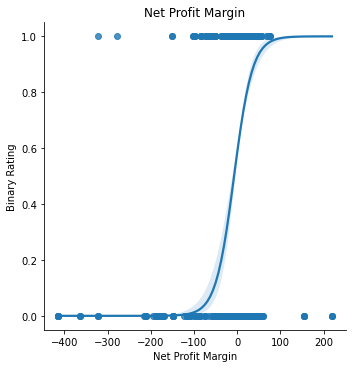

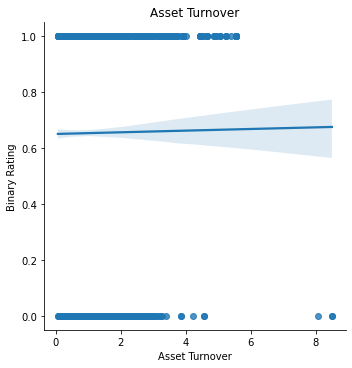

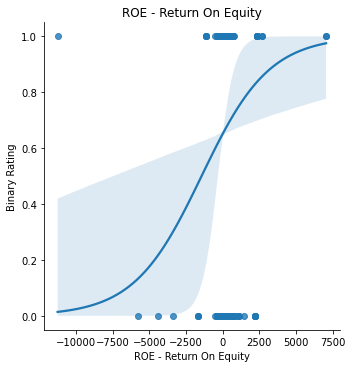

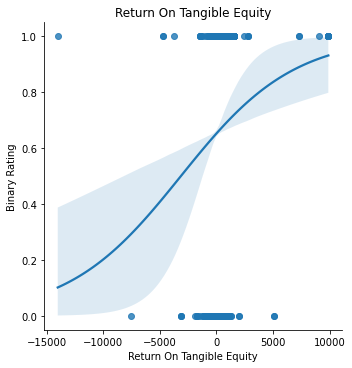

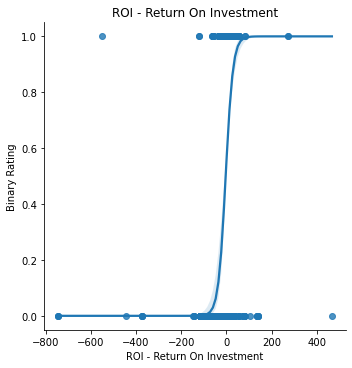

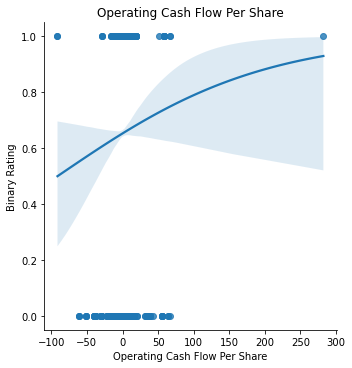

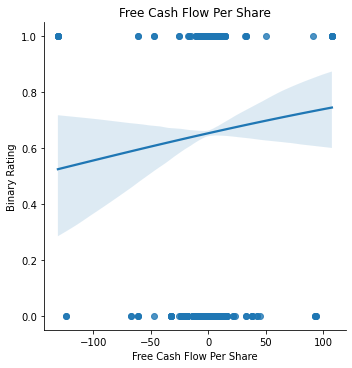

In [54]:
for i in nums.columns:
    sns.lmplot(data=nums,x=i,y='Binary Rating',logistic=True)
    plt.title(i)
    plt.show()

## There are two numerical variables that do not appear to provide any importance to the rating. The first is SIC code which is no surprise since it is a numerical representation of 'Sector'. It was previously observed that certain sectors are more commonly investable than others, so it may be worth re-categorizing this feature. The second variable is 'Asset Turnover' where there does not appear to be any correlation with the Binary rating.

In [72]:
#Dropping Irrelevant features
nums= nums.drop(columns=['Asset Turnover','SIC Code'])
nums

,CIK,Binary Rating,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Net Profit Margin,ROE - Return On Equity,Return On Tangible Equity,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,1056903,1,1.1507,0.4551,0.8847,77.6230,8.3224,8.1724,8.1978,4.4530,1.9957,-0.1333
1,8670,1,1.1129,0.0072,0.0073,43.6619,13.5690,22.0354,47.2858,21.8765,0.2501,0.3132
2,8858,1,1.9276,0.2924,0.4255,11.9008,2.1418,13.6376,16.7991,9.6494,-7.6079,-7.3231
3,1035201,1,0.8358,0.4708,0.9491,64.5096,9.0246,9.6412,9.7015,5.1018,1.7438,-0.8999
4,721371,1,1.2931,0.2644,0.4036,3.8385,0.6518,11.1256,19.4184,8.1844,1.9725,2.4174
...,...,...,...,...,...,...,...,...,...,...,...,...
7800,1065088,1,3.4927,0.5065,1.0263,79.3878,20.0768,29.6077,95.6757,14.6116,-1.2323,-1.2826
7801,1065088,1,3.4927,0.5065,1.0263,79.3878,20.0768,29.6077,95.6757,14.6116,-1.2323,-1.2826
7802,739708,0,1.7606,0.1034,0.1523,54.2787,8.0626,11.8335,13.5108,10.6101,0.0907,1.2552
7803,739708,0,1.7606,0.1034,0.1523,54.2787,8.0626,11.8335,13.5108,10.6101,0.0907,1.2552


In [74]:
#Combining all usable variables
data = nums
data['Sector'] = cats['Sector']
data = pd.get_dummies(data, columns=['Sector'])
data

,CIK,Binary Rating,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Net Profit Margin,ROE - Return On Equity,Return On Tangible Equity,ROI - Return On Investment,...,Sector_Durbl,Sector_Enrgy,Sector_Hlth,Sector_Manuf,Sector_Money,Sector_NoDur,Sector_Other,Sector_Shops,Sector_Telcm,Sector_Utils
0,1056903,1,1.1507,0.4551,0.8847,77.6230,8.3224,8.1724,8.1978,4.4530,...,0,0,0,0,0,0,0,0,0,1
1,8670,1,1.1129,0.0072,0.0073,43.6619,13.5690,22.0354,47.2858,21.8765,...,0,0,0,0,0,0,0,0,0,0
2,8858,1,1.9276,0.2924,0.4255,11.9008,2.1418,13.6376,16.7991,9.6494,...,0,0,0,0,0,0,0,1,0,0
3,1035201,1,0.8358,0.4708,0.9491,64.5096,9.0246,9.6412,9.7015,5.1018,...,0,0,0,0,0,0,0,0,0,1
4,721371,1,1.2931,0.2644,0.4036,3.8385,0.6518,11.1256,19.4184,8.1844,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,1065088,1,3.4927,0.5065,1.0263,79.3878,20.0768,29.6077,95.6757,14.6116,...,0,0,0,0,0,0,0,0,0,0
7801,1065088,1,3.4927,0.5065,1.0263,79.3878,20.0768,29.6077,95.6757,14.6116,...,0,0,0,0,0,0,0,0,0,0
7802,739708,0,1.7606,0.1034,0.1523,54.2787,8.0626,11.8335,13.5108,10.6101,...,0,0,0,0,0,0,0,0,1,0
7803,739708,0,1.7606,0.1034,0.1523,54.2787,8.0626,11.8335,13.5108,10.6101,...,0,0,0,0,0,0,0,0,1,0


# Modeling

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn import linear_model

In [87]:
X = data.drop(columns=['Binary Rating'])
y = data['Binary Rating']

In [88]:
#Split the Data into Training and Testing sets with test size as #30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [89]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (5463, 23)
X_test (2342, 23)
y_train (5463,)
y_test (2342,)


## I will run four seperate models for this classification and select the best performing to tune and evaluate.

    -Logistic Regression: This should be a suitable model due to our binary classification and our data consisting of continuous variables. The data fits all assumptions of this model, however becasue there is a lot of concentration on the mean values this model may struggle.
    -SVM: Similar to logistic regression, the data is all continuous and meets assumptions of this model. It is beneficial to test this model alongside logistic regression as it will look at look at distances of the data instead of statistics. A pitfall is that a lot of the data points in both decision categories overlap. I do not expect this model to perform well given the overlapping nature of the data.
    - Decission Tree: This model works well on both continuous and categorical data unlike logistic regression. This advantage may be beneficial while including the 'Sector' dummy variables. However this model tends to overfit easily and may struggle during testing.
    - Random Forest: This model is a more robust version of the Decision tree. It utilizes many decision trees to validate a decision by generating many "votes". The downside is that it will be slower to process, however that downside is irrelevant in this case. I expect to use the radnom forest over the decision tree if the logistic regression model is less affective, but it will be beneficial to see any upgrade in performance compared to the single tree

In [90]:
classifiers = []
model1 = linear_model.LogisticRegression()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [91]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of LogisticRegression() is 0.639197267292912
Confusion Matrix of LogisticRegression() is [[  42  777]
 [  68 1455]]
Accuracy of SVC() is 0.6502988898377455
Confusion Matrix of SVC() is [[   0  819]
 [   0 1523]]
Accuracy of DecisionTreeClassifier() is 0.8953885567890691
Confusion Matrix of DecisionTreeClassifier() is [[ 689  130]
 [ 115 1408]]
Accuracy of RandomForestClassifier() is 0.9128949615713066
Confusion Matrix of RandomForestClassifier() is [[ 691  128]
 [  76 1447]]


## Logistic Regression and SVM models both achieved a similar accuracy score of ~64% The Random Forest Classifier was the highest performing model at 91.29% achieving  1.2% more accuracy than the single decission tree. This will be the final model.

## Evaluating

In [94]:
from sklearn import metrics as mets

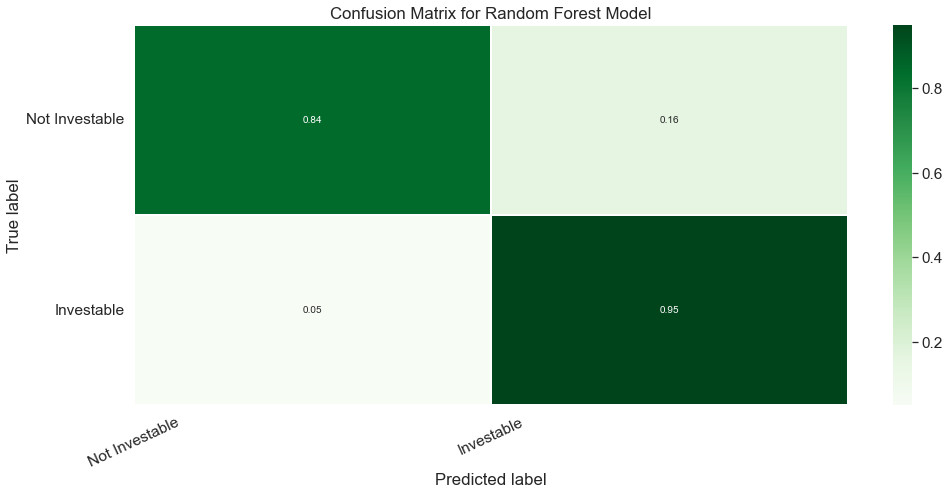

In [92]:
# Get and reshape confusion matrix data
matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Not Investable', 'Investable']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## When looking at the confusion matrix above, we can see that the model did a very good job at identifying the companies that are Investable. However, there were more occurances of a Type I error where the model identified an investable company when it was not. This could be an issue when using this model, because we do not want to lose money on investments. We would rather not invest at all and miss out, rather than invest and lose. Fixing this recall should be a focus in further development.

In [95]:
# View the classification report for test data and predictions
print(mets.classification_report(y_test, y_pred,target_names=['Not Investible','Investible']))

                precision    recall  f1-score   support

Not Investible       0.90      0.84      0.87       819
    Investible       0.92      0.95      0.93      1523

      accuracy                           0.91      2342
     macro avg       0.91      0.90      0.90      2342
  weighted avg       0.91      0.91      0.91      2342



## Above we can further see the type I error illustrated

In [98]:
from sklearn.model_selection import cross_validate

## Since the major disadvantage to our Random Forest model was the chance of overfitting, we can use cross validation to get a better idea of the models true accuracy if it gets deployed.

In [102]:
cvs = cross_validate(classifiers[3], X, y, cv = 10, return_estimator=True)

In [103]:
score = cvs['test_score'].mean()
score

0.8349655274303162

## There is an 83.49% average test score during cross validation. This makes sense, as it is still outperforming the other models in testing although not as drastically higher as it once was. This reassures that the model is still superior although we are more cautious about the results than orginially, and the model should be tuned and other features should be brought in if deployment was under consideration.

In [104]:
#create a matrix of feature importances across all folds
fi = []
classification_reports = []
for i in cvs['estimator']:
    fi.append(list(i.feature_importances_))
    
    
#average column-wise 
fi_avg = np.mean(fi, axis = 0)

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_22692/2851363132.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


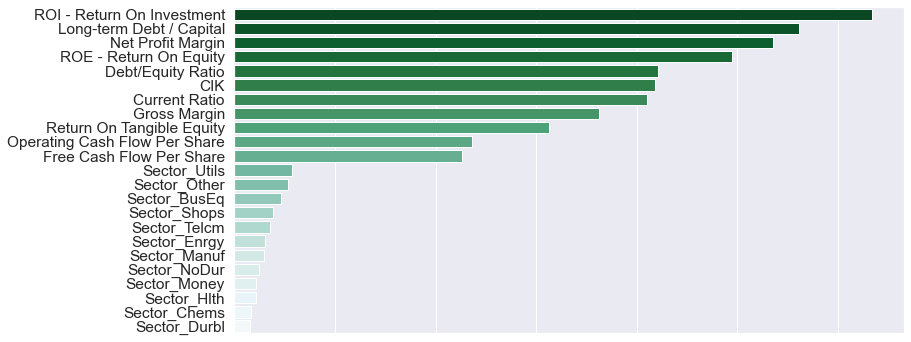

In [105]:
#convert to pandas series with feature names as index
fi_avg = pd.Series(fi_avg, index = X.columns).sort_values(ascending=False) 

#create plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Observing the feature importances, the Sectors show that there is in fact a relationship with being investable, however the sector itself is not as important as the financial ratios in determining a good investment.